In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [2]:
# Load DataSet
df=pd.read_csv('data/train.csv')
df= df.drop(['Id'],axis=1)

**Check basic info on the data set**

In [3]:
# Displaying the First Five Rows
df.head()

,date,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type,Usage_kWh
0,1/1/2018 0:15,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load,3.17
1,1/1/2018 0:30,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load,4.00
2,1/1/2018 0:45,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load,3.24
3,1/1/2018 1:00,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load,3.31
4,1/1/2018 1:15,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load,3.82


Data Description:

In [4]:
# DataFrame Dimensions
data_shape = df.shape
data_shape

(27999, 11)

In [5]:
num_rows = data_shape[0]
num_columns = data_shape[1]
print("Number of Samples:", num_rows)
print("Number of Features:", num_columns)

Number of Samples: 27999
Number of Features: 11


In [6]:
df.columns

Index(['date', 'Lagging_Current_Reactive.Power_kVarh',
       'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
       'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM',
       'WeekStatus', 'Day_of_week', 'Load_Type', 'Usage_kWh'],
      dtype='object')

In [7]:
# Descriptive Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Lagging_Current_Reactive.Power_kVarh,27999.0,13.230912,16.469935,0.00,2.74,5.04,22.82,96.91
Leading_Current_Reactive_Power_kVarh,27880.0,3.881065,7.495718,0.00,0.00,0.00,2.23,27.76
CO2(tCO2),27999.0,0.011790,0.016354,0.00,0.00,0.00,0.02,0.07
Lagging_Current_Power_Factor,27999.0,79.940163,19.397474,36.94,61.64,87.99,99.08,100.00
Leading_Current_Power_Factor,27923.0,84.479796,30.422037,12.50,99.81,100.00,100.00,100.00
NSM,27999.0,42718.611379,24933.404759,0.00,20700.00,42300.00,63900.00,85500.00
Usage_kWh,27999.0,27.888785,33.919271,2.45,3.13,4.57,51.19,153.14


In [8]:
# Display a summary of the DataFrame, including column names, data types, and non-null value counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27999 entries, 0 to 27998
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   date                                  27999 non-null  object 
 1   Lagging_Current_Reactive.Power_kVarh  27999 non-null  float64
 2   Leading_Current_Reactive_Power_kVarh  27880 non-null  float64
 3   CO2(tCO2)                             27999 non-null  float64
 4   Lagging_Current_Power_Factor          27999 non-null  float64
 5   Leading_Current_Power_Factor          27923 non-null  float64
 6   NSM                                   27999 non-null  int64  
 7   WeekStatus                            26225 non-null  object 
 8   Day_of_week                           26225 non-null  object 
 9   Load_Type                             27999 non-null  object 
 10  Usage_kWh                             27999 non-null  float64
dtypes: float64(6), 

 **Exploratory Data Analysis (EDA)**



Pairplots using seaborn

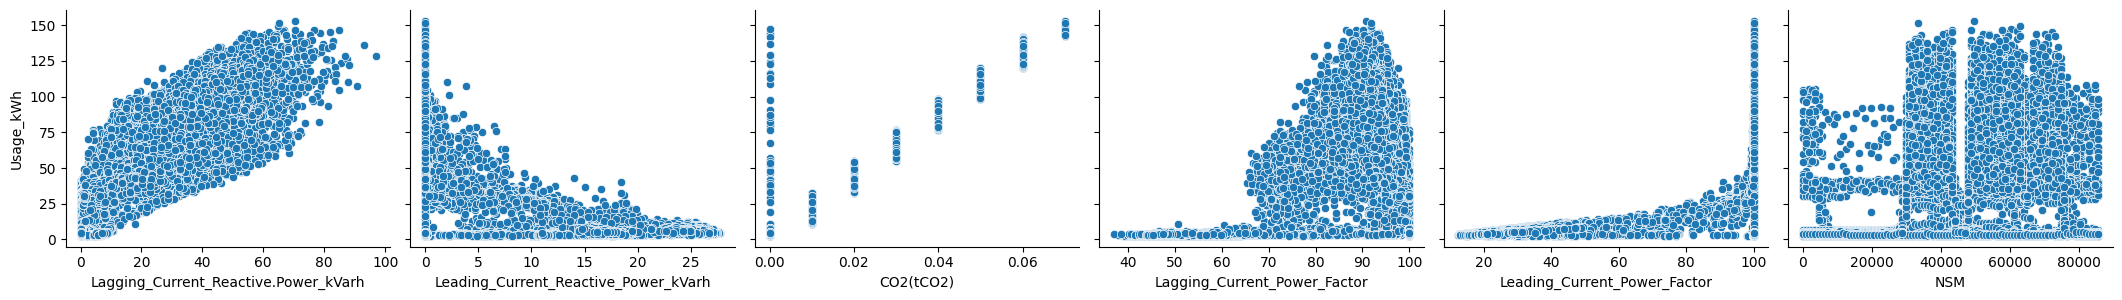

In [12]:
cols = ['Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)',
        'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM']

sns.pairplot(df, x_vars=cols, y_vars='Usage_kWh', height=3, aspect=1.2, kind='scatter')
plt.show()

Average Usage by Week Status


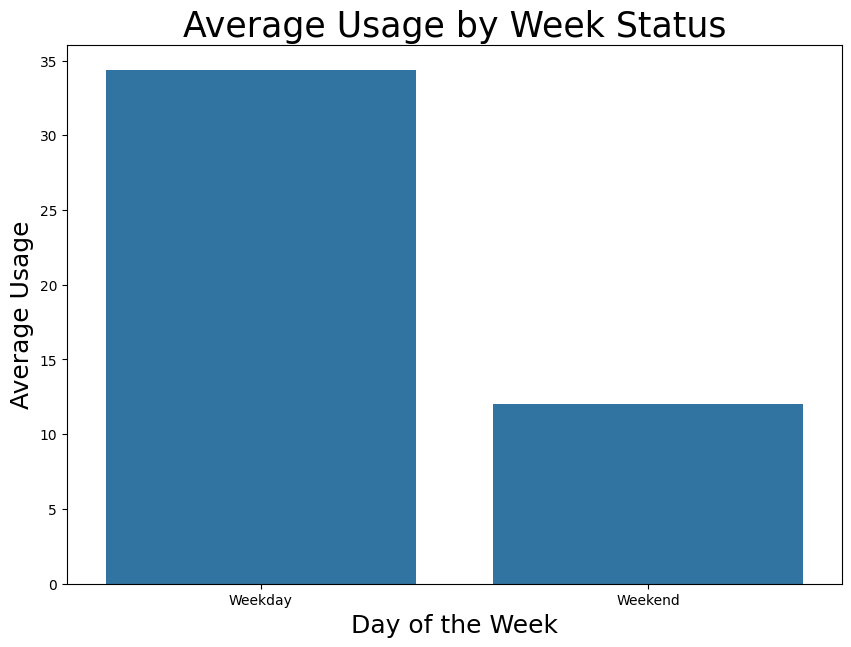

In [13]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="WeekStatus", y="Usage_kWh",errorbar=None)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Average Usage", fontsize=18)
plt.title("Average Usage by Week Status", fontsize=25)
plt.show()




Average Usage by Day of the Week

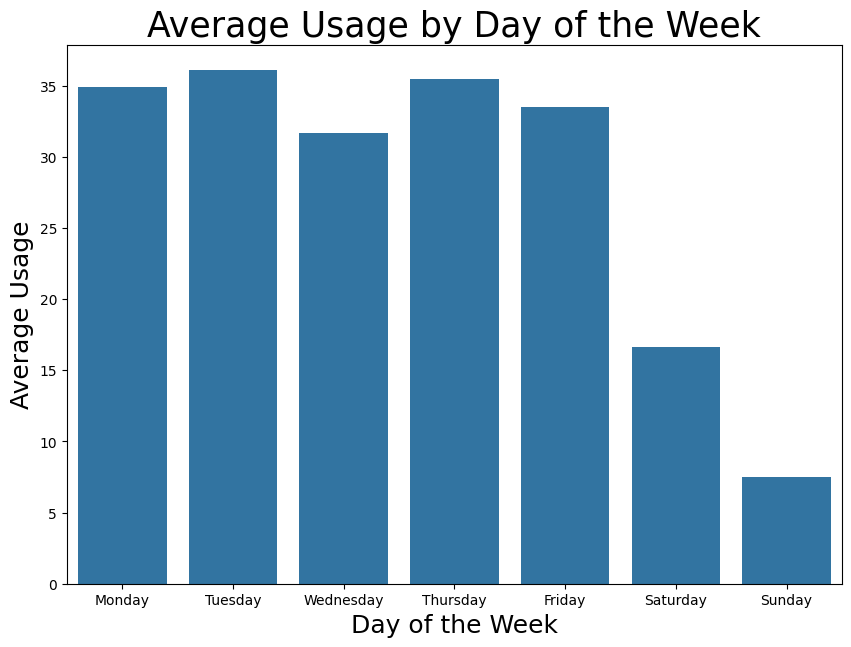

In [14]:
plt.figure(figsize=(10, 7))
sns.barplot(data=df, x="Day_of_week", y="Usage_kWh",errorbar=None)
plt.xlabel("Day of the Week", fontsize=18)
plt.ylabel("Average Usage", fontsize=18)
plt.title("Average Usage by Day of the Week", fontsize=25)
plt.show()


Energy Consumption by Week Status and Load Type


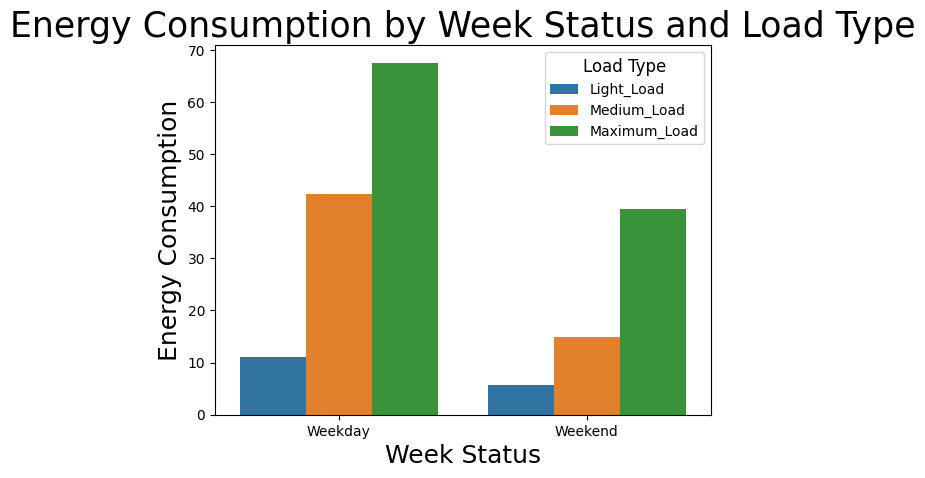

In [15]:
sns.barplot(data=df, x="WeekStatus", y="Usage_kWh", hue="Load_Type",errorbar=None)
plt.xlabel("Week Status", fontsize=18)
plt.ylabel("Energy Consumption", fontsize=18)
plt.title("Energy Consumption by Week Status and Load Type", fontsize=25)
plt.legend(title="Load Type", title_fontsize=12)
plt.show()


In [9]:
df.set_index('date', inplace=True)

Correlation Heatmap

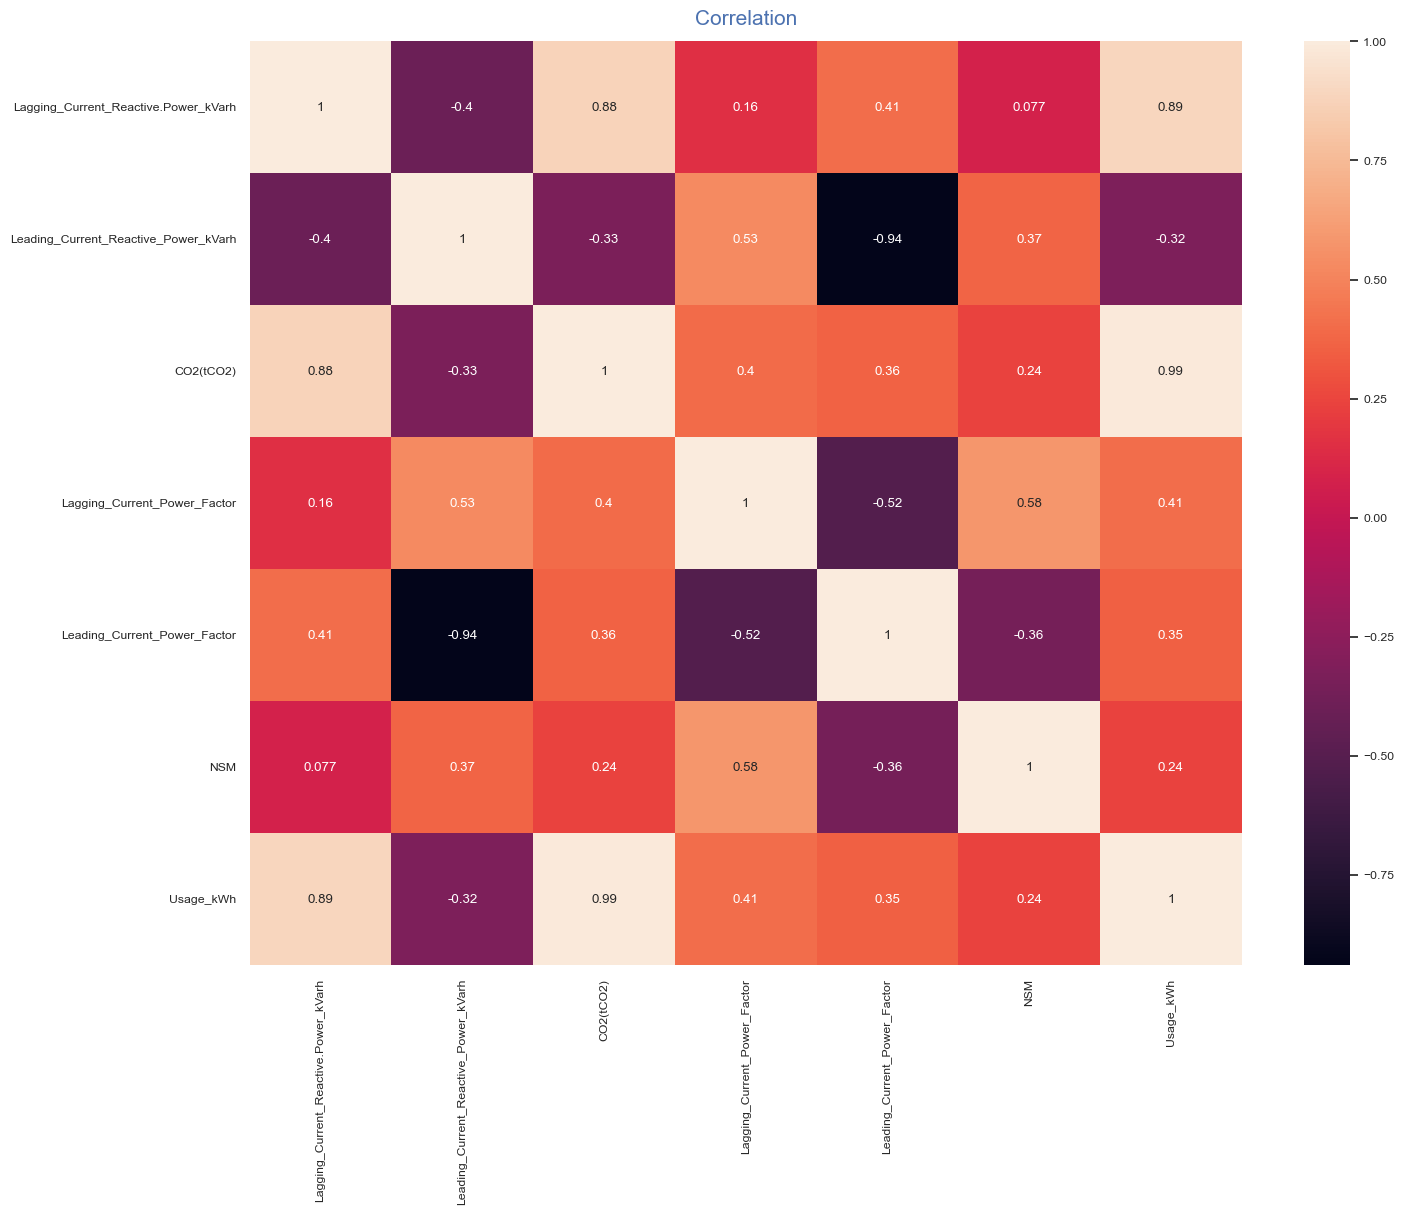

In [10]:
numeric_df = df.select_dtypes(include=['number'])

sns.set(font_scale=0.8)
plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation", fontsize=15, color='b', pad=12, loc='center')
plt.show()

**Handling Missing And Categorical data**

In [11]:
missing_value_counts = df.isna().sum()

df_cleaned = df.dropna()

print("DataFrame after dropping missing values:")
print(df_cleaned)


DataFrame after dropping missing values:
                  Lagging_Current_Reactive.Power_kVarh  \
date                                                     
1/1/2018 0:15                                     2.95   
1/1/2018 0:30                                     4.46   
1/1/2018 0:45                                     3.28   
1/1/2018 1:00                                     3.56   
1/1/2018 1:15                                     4.50   
...                                                ...   
19/10/2018 14:45                                 32.62   
19/10/2018 15:00                                 35.46   
19/10/2018 15:15                                 30.92   
19/10/2018 15:30                                 58.18   
19/10/2018 15:45                                 40.46   

                  Leading_Current_Reactive_Power_kVarh  CO2(tCO2)  \
date                                                                
1/1/2018 0:15                                      0.0       0.00 

In [12]:
df_cleaned.dtypes

Lagging_Current_Reactive.Power_kVarh    float64
Leading_Current_Reactive_Power_kVarh    float64
CO2(tCO2)                               float64
Lagging_Current_Power_Factor            float64
Leading_Current_Power_Factor            float64
NSM                                       int64
WeekStatus                               object
Day_of_week                              object
Load_Type                                object
Usage_kWh                               float64
dtype: object

In [157]:
df_cleaned=df_cleaned.drop(['date'])

KeyError: "['date'] not found in axis"

In [13]:
# Perform one-hot encoding on categorical variables
df_cleaned = pd.get_dummies(df_cleaned)

In [14]:
df_cleaned.head()

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,Usage_kWh,WeekStatus_Weekday,WeekStatus_Weekend,Day_of_week_Friday,Day_of_week_Monday,Day_of_week_Saturday,Day_of_week_Sunday,Day_of_week_Thursday,Day_of_week_Tuesday,Day_of_week_Wednesday,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,,,,,,,,,,
1/1/2018 0:15,2.95,0.0,0.0,73.21,100.0,900,3.17,True,False,False,True,False,False,False,False,False,True,False,False
1/1/2018 0:30,4.46,0.0,0.0,66.77,100.0,1800,4.00,True,False,False,True,False,False,False,False,False,True,False,False
1/1/2018 0:45,3.28,0.0,0.0,70.28,100.0,2700,3.24,True,False,False,True,False,False,False,False,False,True,False,False
1/1/2018 1:00,3.56,0.0,0.0,68.09,100.0,3600,3.31,True,False,False,True,False,False,False,False,False,True,False,False
1/1/2018 1:15,4.50,0.0,0.0,64.72,100.0,4500,3.82,True,False,False,True,False,False,False,False,False,True,False,False


**Data Preprocessing**

 Splitting the DataFrame






In [15]:
#Independent Features
X = df_cleaned.drop(['Usage_kWh'], axis=1)  
#Dependent Feature/Target
y=df_cleaned.Usage_kWh    


Feature Selection


In [16]:
# Feature Selection using SelectKBest and f_regression
from sklearn.feature_selection import SelectKBest,f_regression
y_=y.astype('int')
select_reg =  SelectKBest(k=8, score_func=f_regression).fit(X, y_)


In [17]:
X_Select = select_reg.transform(X)
X_Select.shape

(26030, 8)

In [18]:
Selected_features = pd.DataFrame({'columns': X.columns,
                              'Kept': select_reg.get_support()})
Selected_features

,columns,Kept
0,Lagging_Current_Reactive.Power_kVarh,True
1,Leading_Current_Reactive_Power_kVarh,True
2,CO2(tCO2),True
3,Lagging_Current_Power_Factor,True
4,Leading_Current_Power_Factor,True
5,NSM,False
6,WeekStatus_Weekday,True
7,WeekStatus_Weekend,False
8,Day_of_week_Friday,False
9,Day_of_week_Monday,False


 Standardizing the Features

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_Select)

Test-train split

In [20]:
# Splitting the Data into Training and Testing Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Set - X_train shape:", X_train.shape)
print("Testing Set - X_test shape:", X_test.shape)
print("Training Set - y_train shape:", y_train.shape)
print("Testing Set - y_test shape:", y_test.shape)


Training Set - X_train shape: (18221, 8)
Testing Set - X_test shape: (7809, 8)
Training Set - y_train shape: (18221,)
Testing Set - y_test shape: (7809,)


**Linear Regression Model**

In [44]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [45]:
#The intercept term of the linear model
lr.intercept_

27.83198566414647

In [46]:
# The coefficients of the linear model
lr.coef_


array([ 5.71827302e+00,  4.97523625e-01,  2.62449679e+01,  2.74797315e+00,
        2.14848901e+00, -4.86171039e-02,  2.01434723e-02,  8.46862667e-03,
       -8.66426407e-01, -2.47769928e-01])

In [47]:
y_pred=lr.predict(X_test)

In [48]:
lr_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
lr_model[0:5]

,Actual Value,Predicted Value,Difference
date,,,
11/9/2018 13:15,55.69,65.292961,-9.602961
6/7/2018 5:30,3.24,1.952658,1.287342
14/08/2018 09:30,82.69,85.261841,-2.571841
8/5/2018 3:30,3.02,3.284899,-0.264899
11/9/2018 23:45,3.06,1.938740,1.121260


Model Evaluation

In [49]:
print('LinearRegression model')
mean_squared_error=metrics.mean_squared_error(y_test,y_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lr.score(X_train,y_train),4))
print('R sqaured testing',round(lr.score(X_test,y_test),4) )

LinearRegression model
Sqaured mean error 4.41
R squared training 0.9768
R sqaured testing 0.9828


Actual vs. Predicted Scatter Plot

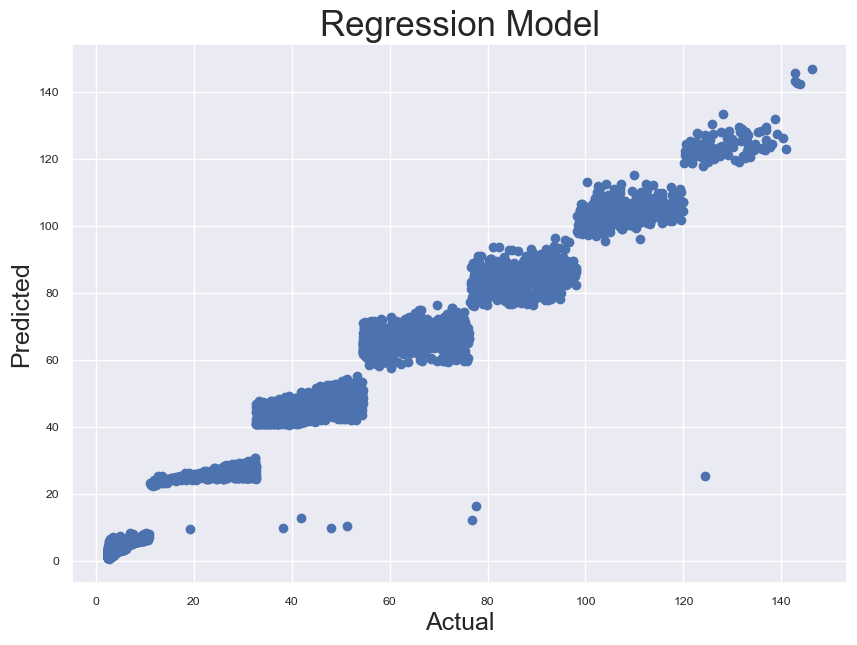

In [59]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Regression Model", fontsize=25)
plt.show()


**Ridge Regression Model**

In [41]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV, KFold
from sklearn import metrics

degree = 2
poly = PolynomialFeatures(degree)

lasso_poly = make_pipeline(poly, Lasso(max_iter=10000))

param_grid = {'polynomialfeatures__degree': [1, 2],
              'lasso__alpha': [0.1, 1]}

kf = KFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=lasso_poly, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

print("Best hyperparameters:", grid_search.best_params_)

mse = metrics.mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = best_model.score(X_test, y_test)
print('R-squared Score:', r2)


Best hyperparameters: {'lasso__alpha': 0.1, 'polynomialfeatures__degree': 2}
Mean Squared Error: 6.454885000860664
R-squared Score: 0.9942809112265694


In [195]:
yridge_pred=ridge_poly.predict(X_test)

Model Evaluation

In [196]:
print('Ridge Regression Model')
mean_squared_error = metrics.mean_squared_error(y_test, yridge_pred)
print('Squared mean error:', round(np.sqrt(mean_squared_error), 2))
print('R squared training:', round(ridge_poly.score(X_train, y_train), 4))
print('R squared testing:', round(ridge_poly.score(X_test, y_test), 4))

Ridge Regression Model
Squared mean error: 2.17
R squared training: 0.9961
R squared testing: 0.9958


Actual vs. Predicted Scatter Plot

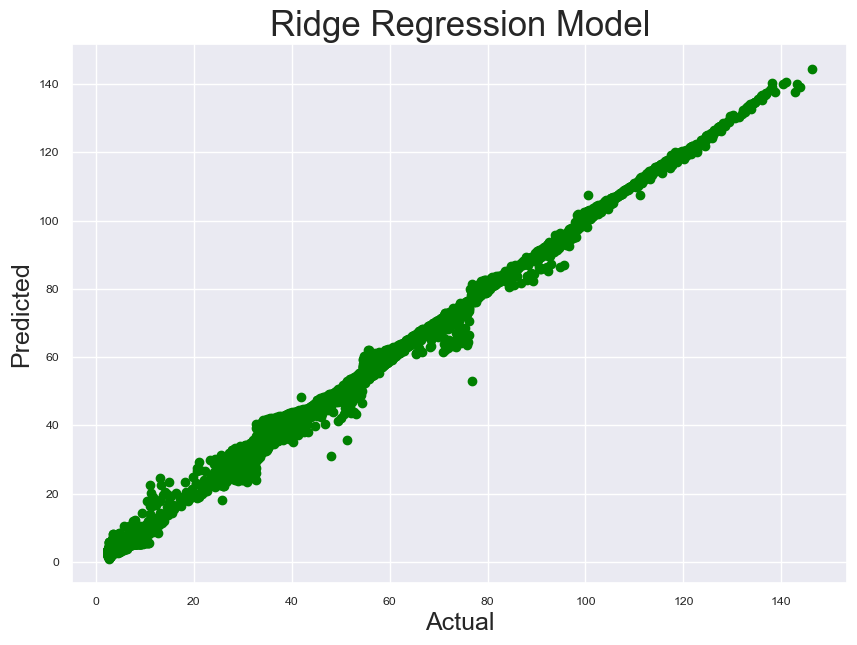

In [172]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, yridge_pred, color='green')
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Ridge Regression Model", fontsize=25)
plt.show()


**Lasso Regression Model** 

In [54]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.5)
lasso.fit(X_train,y_train)

Lasso(alpha=0.5)

In [55]:
ylasso_pred=lasso.predict(X_test)

In [56]:
lasso_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':ylasso_pred,'Difference':y_test-ylasso_pred})
lasso_model[0:5]

,Actual Value,Predicted Value,Difference
date,,,
11/9/2018 13:15,55.69,64.872660,-9.182660
6/7/2018 5:30,3.24,3.533085,-0.293085
14/08/2018 09:30,82.69,84.508311,-1.818311
8/5/2018 3:30,3.02,3.502423,-0.482423
11/9/2018 23:45,3.06,3.438739,-0.378739


Model Evaluation

In [57]:
print('Lasso Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,ylasso_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(lasso.score(X_train,y_train),4))
print('R sqaured testing',round(lasso.score(X_test,y_test),4) )

Lasso Regression Model
Sqaured mean error 4.45
R squared training 0.9756
R sqaured testing 0.9825


Actual vs. Predicted Scatter Plot

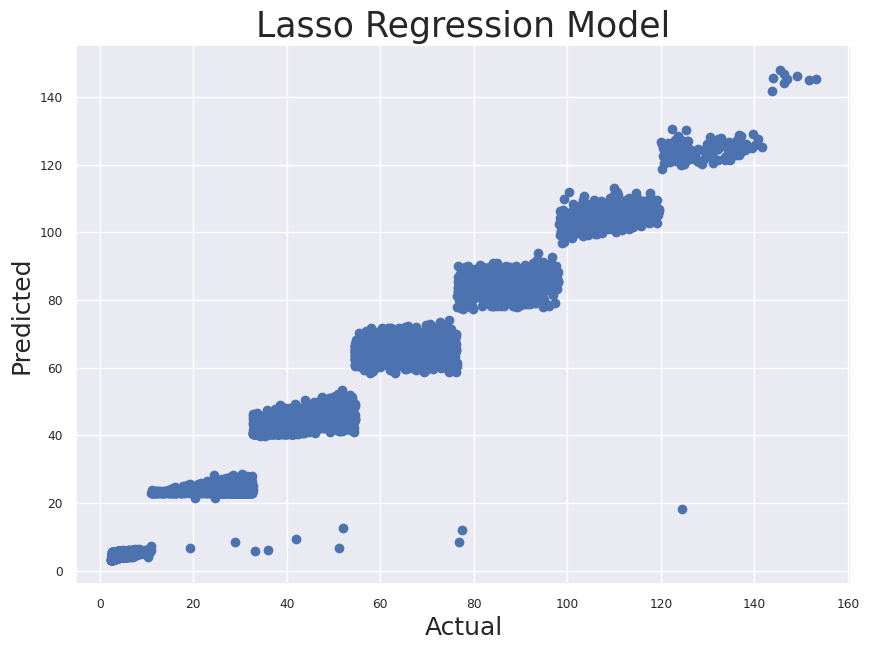

In [149]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, ylasso_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Lasso Regression Model", fontsize=25)
plt.show()



**ElasticNet Regression Model** 


In [150]:
from sklearn.linear_model import ElasticNet
elasticNet=ElasticNet(alpha=0.5)
elasticNet.fit(X_train,y_train)

ElasticNet(alpha=0.5)

In [151]:
yelasticNet_pred=elasticNet.predict(X_test)

In [152]:
elasticNet_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yelasticNet_pred,'Difference':y_test-yelasticNet_pred})
elasticNet_model[0:5]

,Actual Value,Predicted Value,Difference
11356,2.88,4.245874,-1.365874
26543,60.77,72.963287,-12.193287
2445,120.42,110.137992,10.282008
14649,3.13,1.770972,1.359028
32699,58.86,57.339843,1.520157


Model Evaluation

In [153]:
print('ElasticNet Regression model')
mean_squared_error=metrics.mean_squared_error(y_test,yelasticNet_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(elasticNet.score(X_train,y_train),4))
print('R sqaured testing',round(elasticNet.score(X_test,y_test),4) )

ElasticNet Regression model
Sqaured mean error 6.76
R squared training 0.9566
R sqaured testing 0.9592


Actual vs. Predicted Scatter Plot

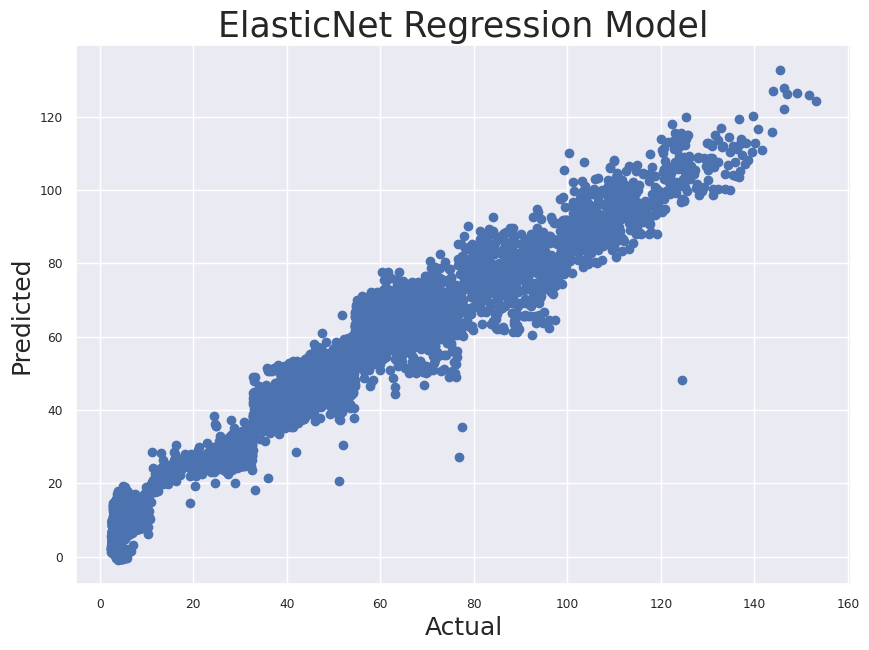

In [154]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test, yelasticNet_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("ElasticNet Regression Model", fontsize=25)
plt.show()


**Support Vector Regression Model**

In [21]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR()

In [22]:
yregressor_pred = regressor.predict(X_test)
regressor_model=pd.DataFrame({'Actual Value':y_test,'Predicted Value':yregressor_pred,'Difference':y_test-yregressor_pred})
regressor_model[0:5]

,Actual Value,Predicted Value,Difference
date,,,
12/8/2018 5:30,2.74,2.801148,-0.061148
19/09/2018 08:00,4.90,4.867736,0.032264
17/06/2018 02:00,2.81,2.821500,-0.011500
13/06/2018 16:00,3.60,5.037221,-1.437221
26/08/2018 20:45,3.10,3.184966,-0.084966


In [23]:
print('Support Vector Regression Model')
mean_squared_error=metrics.mean_squared_error(y_test,yregressor_pred)
print('Sqaured mean error', round(np.sqrt(mean_squared_error),2))
print('R squared training',round(regressor.score(X_train,y_train),4))
print('R sqaured testing',round(regressor.score(X_test,y_test),4) )

Support Vector Regression Model
Sqaured mean error 2.64
R squared training 0.9932
R sqaured testing 0.9938


Actual vs. Predicted Scatter Plot

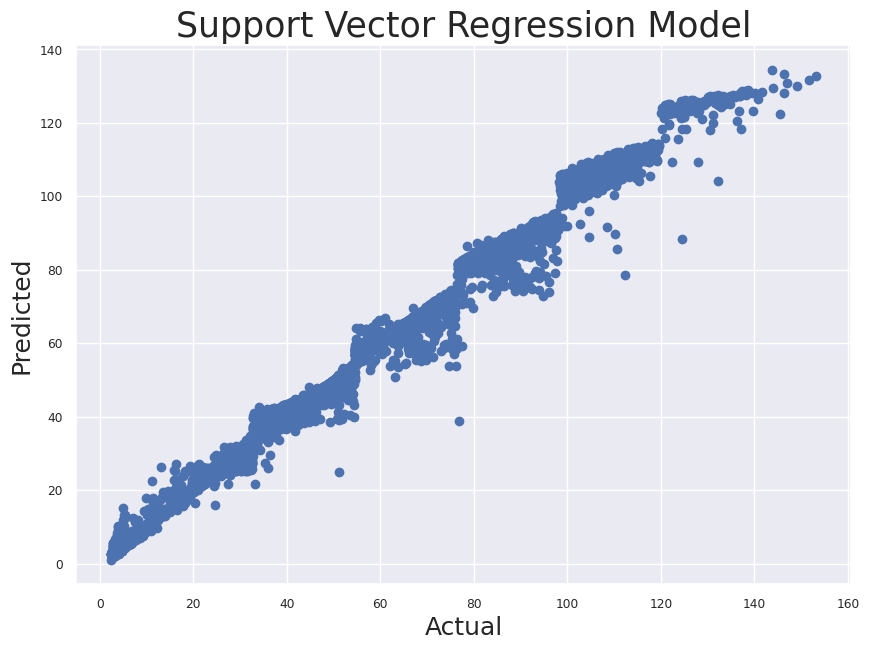

In [158]:
plt.figure(figsize=(10, 7))
plt.scatter(y_test,yregressor_pred)
plt.xlabel("Actual", fontsize=18)
plt.ylabel("Predicted", fontsize=18)
plt.title("Support Vector Regression Model", fontsize=25)
plt.show()

**Regression Models Comparison**

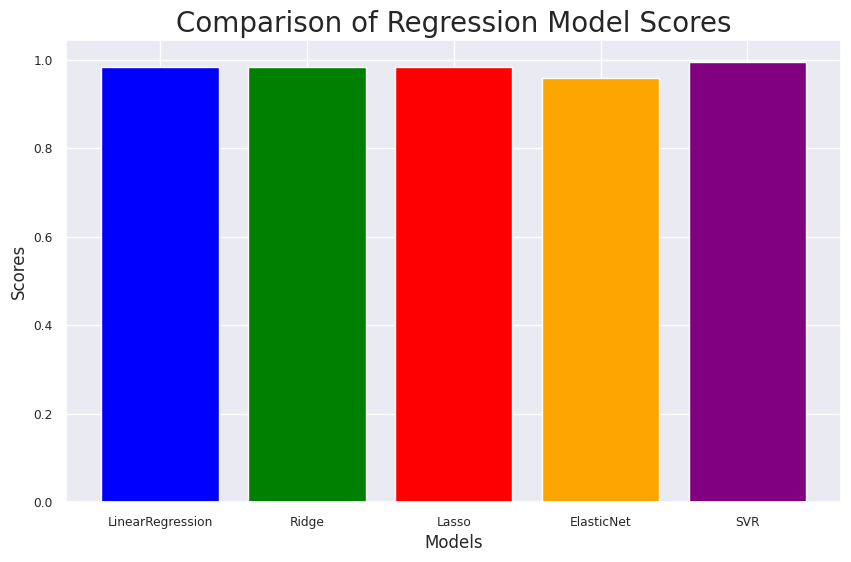

In [159]:
# Comparison of Regression Model R2 Scores
models = ['LinearRegression', 'Ridge', 'Lasso', 'ElasticNet', 'SVR']
score = [lr.score(X_test, y_test),
         ridge.score(X_test, y_test),
         lasso.score(X_test, y_test),
         elasticNet.score(X_test, y_test),
         regressor.score(X_test, y_test)]
colors = ['blue', 'green', 'red', 'orange', 'purple']

plt.figure(figsize=(10, 6))
plt.bar(models, score, color=colors)
plt.xlabel('Models',fontsize=12)
plt.ylabel('Scores',fontsize=12)
plt.title('Comparison of Regression Model Scores',fontsize=20)
plt.show()


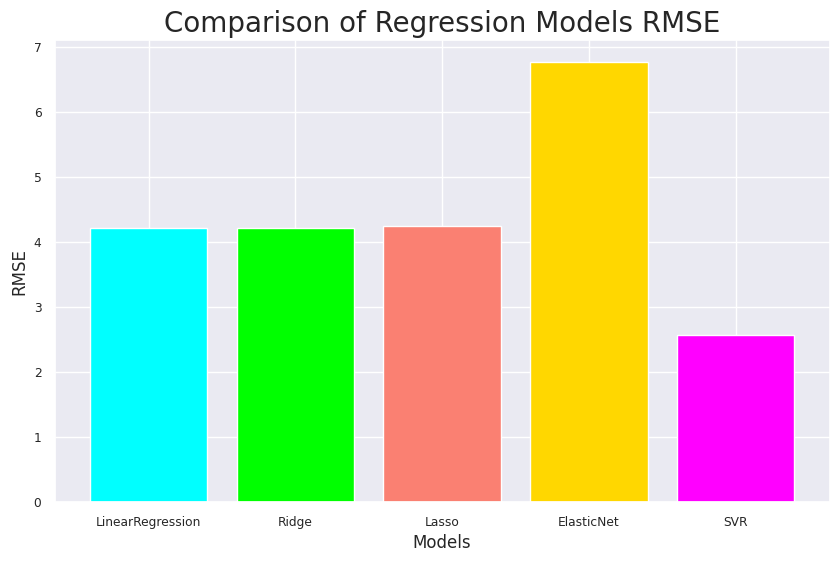

In [160]:
# Comparison of Regression Models RMSE
rmse = [np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yridge_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, ylasso_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yelasticNet_pred)),
        np.sqrt(metrics.mean_squared_error(y_test, yregressor_pred))]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse, color=['cyan', 'lime', 'salmon', 'gold', 'magenta'])
plt.xlabel('Models',fontsize=12)
plt.ylabel('RMSE',fontsize=12)
plt.title('Comparison of Regression Models RMSE',fontsize=20)
plt.show()


In [24]:
testing_data = pd.read_csv('data/test.csv')
testing_data = testing_data.set_index('date')
testing_data = testing_data.drop(['Id', 'Day_of_week','NSM'], axis=1)

In [25]:
numerical_cols_test = testing_data.select_dtypes(include=[np.number]).columns.tolist()

# Remove the Id, date, and target column
numerical_cols_test = [col for col in numerical_cols_test if col not in ['date']]

scaler_test = StandardScaler()

testing_data[numerical_cols_test] = scaler_test.fit_transform(testing_data[numerical_cols_test])

In [26]:
numerical_cols_test

['Lagging_Current_Reactive.Power_kVarh',
 'Leading_Current_Reactive_Power_kVarh',
 'CO2(tCO2)',
 'Lagging_Current_Power_Factor',
 'Leading_Current_Power_Factor']

In [27]:
testing_data = pd.get_dummies(testing_data)

In [28]:
testing_data

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus_Weekday,WeekStatus_Weekend,Load_Type_Light_Load,Load_Type_Maximum_Load,Load_Type_Medium_Load
date,,,,,,,,,,
19/10/2018 16:00,3.293564,-0.542462,2.588771,0.064562,0.529035,True,False,False,True,False
19/10/2018 16:15,2.685094,-0.542462,1.933952,0.130005,0.529035,True,False,False,True,False
19/10/2018 16:30,2.740176,-0.542462,1.933952,0.130005,0.529035,True,False,False,True,False
19/10/2018 16:45,1.546293,-0.542462,1.279133,0.060959,0.529035,True,False,False,True,False
19/10/2018 17:00,1.467512,-0.542462,1.279133,0.117997,0.529035,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
31/12/2018 23:00,-0.473829,-0.542462,-0.685323,-1.261712,0.529035,True,False,True,False,False
31/12/2018 23:15,-0.545564,-0.542462,-0.685323,-0.744772,0.529035,True,False,True,False,False
31/12/2018 23:30,-0.582073,-0.532716,-0.685323,-0.389938,0.528384,True,False,True,False,False


In [29]:
testing_data = testing_data.drop(['Load_Type_Medium_Load','WeekStatus_Weekend'], axis=1)

In [30]:
testing_data

,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,WeekStatus_Weekday,Load_Type_Light_Load,Load_Type_Maximum_Load
date,,,,,,,,
19/10/2018 16:00,3.293564,-0.542462,2.588771,0.064562,0.529035,True,False,True
19/10/2018 16:15,2.685094,-0.542462,1.933952,0.130005,0.529035,True,False,True
19/10/2018 16:30,2.740176,-0.542462,1.933952,0.130005,0.529035,True,False,True
19/10/2018 16:45,1.546293,-0.542462,1.279133,0.060959,0.529035,True,False,True
19/10/2018 17:00,1.467512,-0.542462,1.279133,0.117997,0.529035,True,False,True
...,...,...,...,...,...,...,...,...
31/12/2018 23:00,-0.473829,-0.542462,-0.685323,-1.261712,0.529035,True,True,False
31/12/2018 23:15,-0.545564,-0.542462,-0.685323,-0.744772,0.529035,True,True,False
31/12/2018 23:30,-0.582073,-0.532716,-0.685323,-0.389938,0.528384,True,True,False


In [38]:
y_test_pred = best_model.predict(testing_data)

c:\Users\tbtw0\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [39]:
from sklearn.metrics import r2_score, mean_squared_error

testing = testing_data.copy()
testing['Usage_kWh'] = y_test_pred

answers_df = pd.read_csv("data/answer.csv")

actual_values = answers_df["Usage_kWh"]
predicted_values = testing["Usage_kWh"]

mse = mean_squared_error(actual_values, predicted_values)

r2 = r2_score(actual_values, predicted_values)

print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)


Mean Squared Error (MSE): 5.891367576945313
R-squared Score: 0.9940270071850776
